In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from ad import adnumber
from ad.admath import *
import math

In [2]:
def Newton_system(F, J, x, eps):
    y=[]
    e=[]
    y.append(x)
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    e.append(F_norm)
    iteration_counter = 0
#     print(np.around(x[0],4),np.around(x[1],4), np.around(F_norm,4))
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        y.append(x)
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        e.append(F_norm)
        iteration_counter += 1
#         print(np.around(x[0],4),np.around(x[1],4), np.around(F_norm,4))

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter, y, e

In [3]:
def F(x):
    y=np.zeros(len(f))
    x_ad = adnumber(x)
    for i in range(len(f)):
        y[i]=f[i](x_ad).x
    return(y)

def J(x):
    y=np.zeros(len(f))
    x_ad = adnumber(x)
    J_f = np.zeros((len(f), len(x_ad)))
    for i in range(len(f)):
        y[i]=f[i](x_ad).x
        for j in range(len(x_ad)):
            J_f[i][j] = f[i](x_ad).d(x_ad[j])
    return(J_f)

In [4]:
def test_Newton_system1(Fx,x,esp):
    x, n, y, e = Newton_system(Fx, J, x, eps)
    return(n,x,y,e)

In [5]:
# w=np.array([[-0.3, 7.]])
# x=np.array([[-0.6, 3.]])
# y=np.array([[1, 3]])
# z=np.array([[1, -5]])
# a=np.array([[1.3, -5]])
# b=np.array([[2., -7.]])
# c=np.array([[2., -6.]])
# d=np.array([[2.5, -1.5]])
# ee=np.array([[1.3, -11]])
# g=np.array([[1., -8]])
# h=np.array([[1.5, -17]])
# i=np.array([[1.5, -16.]])

In [8]:
#initial number
init=np.array([1.3, -11.])

#function
# f=[lambda x: x[0]**2 + x[1]**2 - 4,
#    lambda x: x[0]*x[1] - 1]
# f=[lambda x: admath.exp(x[0]-x[1])-admath.sin(x[0]+x[1]),
#    lambda x: (x[0]**2)*(x[1]**2)-admath.cos(x[0]+x[1])]
f=[lambda x: 0.5*admath.sin(x[0]*x[1])-(0.25*x[1]/admath.pi)-(0.5*x[0]),
   lambda x: (1-(0.25/admath.pi))*(admath.exp(2*x[0])-admath.e)+(admath.e*x[1]/admath.pi)-2*admath.e*x[0]]

#error
eps=0.000001

n,final,step,e=test_Newton_system1(F,init,eps)
print("\n")
print("maka nilai x1= " + str(np.round(final[0],4)) +" dan nilai x2= " + str(np.round(final[1],4)) +" pada iterasi ke-" + str(np.round(n,4)))
ee = np.array(step)
ee

1.3 -11.0 119.6721
0.536 -5.6953 29.0081
0.0575 -3.2186 6.4723
-0.2931 -2.2364 1.1409
-0.4823 -1.9685 0.1189
-0.5168 -1.9327 0.0028
-0.5176 -1.9319 0.0
-0.5176 -1.9319 0.0


maka nilai x1= -0.5176 dan nilai x2= -1.9319 pada iterasi ke-7


array([[  1.3       , -11.        ],
       [  0.53601123,  -5.69528958],
       [  0.05750735,  -3.21862319],
       [ -0.29314324,  -2.23644665],
       [ -0.48225928,  -1.96849866],
       [ -0.51676563,  -1.93272444],
       [ -0.51763755,  -1.93185219],
       [ -0.51763809,  -1.93185165]])

## surface plot and multi plot

<IPython.core.display.Javascript object>


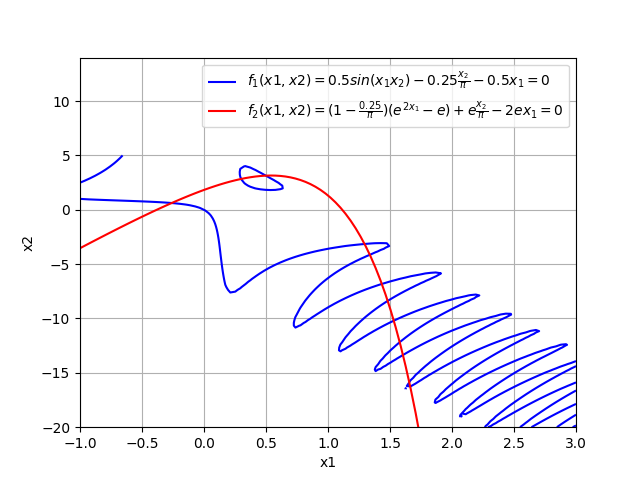

In [9]:
xx = np.linspace(-1.0, 3.0, 100)
yy = np.linspace(-20.0, 5.0, 100)
X, Y = np.meshgrid(xx,yy)
F1 = 0.5*np.sin(X*Y)-(0.25*Y/np.pi)-(0.5*X)
F2 = (1-(0.25/np.pi))*(np.exp(2*X)-math.e)+(math.e*Y/np.pi)-(2*math.e*X)


CS1 = plt.contour(X,Y,F1,[0],colors='b')
CS2 = plt.contour(X,Y,F2,[0],colors='r')

fx3 = r'$f_1(x1,x2)=0.5sin(x_1x_2)-0.25\frac{x_2}{\pi}-0.5x_1=0$'
fx4 = r'$f_2(x1,x2)=(1-\frac{0.25}{\pi})(e^{2x_1}-e)+e\frac{x_2}{\pi}-2ex_1=0$'
# plt.title(fx3)
labels = [fx3, fx4]

CS1.collections[0].set_label(labels[0])
CS2.collections[0].set_label(labels[1])

# plt.plot(w[:,0],w[:,1],'--y')
# plt.plot(w[0,0],w[0,1],'+y',ms=7.5)
# plt.plot(w[len(w)-1,0],w[len(w)-1,1],'oy',ms=7.5)
# plt.plot(x[:,0],x[:,1],'--r')
# plt.plot(x[0,0],x[0,1],'+r',ms=7.5)
# plt.plot(x[len(x)-1,0],x[len(x)-1,1],'or',ms=7.5)
# plt.plot(y[:,0],y[:,1],'--g')
# plt.plot(y[0,0],y[0,1],'+g',ms=7.5)
# plt.plot(y[len(y)-1,0],y[len(y)-1,1],'og',ms=7.5)
# plt.plot(z[:,0],z[:,1],'--k')
# plt.plot(z[0,0],z[0,1],'+k',ms=7.5)
# plt.plot(z[len(z)-1,0],z[len(z)-1,1],'ok',ms=7.5)
# plt.plot(a[:,0],a[:,1],'--c')
# plt.plot(a[0,0],a[0,1],'+c',ms=7.5)
# plt.plot(a[len(a)-1,0],a[len(a)-1,1],'oc',ms=7.5)
# plt.plot(b[:,0],b[:,1],'--m')
# plt.plot(b[0,0],b[0,1],'+m',ms=7.5)
# plt.plot(b[len(b)-1,0],b[len(b)-1,1],'om',ms=7.5)
# plt.plot(c[:,0],c[:,1],'--y')
# plt.plot(c[0,0],c[0,1],'+y',ms=7.5)
# plt.plot(c[len(c)-1,0],c[len(c)-1,1],'oy',ms=7.5)
# plt.plot(d[:,0],d[:,1],'--r')
# plt.plot(d[0,0],d[0,1],'+r',ms=7.5)
# plt.plot(d[len(d)-1,0],d[len(d)-1,1],'or',ms=7.5)
# plt.plot(ee[:,0],ee[:,1],'--g')
# plt.plot(ee[0,0],ee[0,1],'+g',ms=7.5)
# plt.plot(ee[len(ee)-1,0],ee[len(ee)-1,1],'og',ms=7.5)
# plt.plot(g[:,0],g[:,1],'--k')
# plt.plot(g[0,0],g[0,1],'+k',ms=7.5)
# plt.plot(g[len(g)-1,0],g[len(g)-1,1],'ok',ms=7.5)
# plt.plot(h[:,0],h[:,1],'--c')
# plt.plot(h[0,0],h[0,1],'+c',ms=7.5)
# plt.plot(h[len(h)-1,0],h[len(h)-1,1],'oc',ms=7.5)
# plt.plot(i[:,0],i[:,1],'--m')
# plt.plot(i[0,0],i[0,1],'+m',ms=7.5)
# plt.plot(i[len(i)-1,0],i[len(i)-1,1],'om',ms=7.5)

# plt.annotate(str(np.round(w[0,0],4)) +" | " + str(np.round(w[0,1],4)), xy=(w[0,0],w[0,1]), xytext=(w[0,0]-0.5,w[0,1]+1))
# plt.annotate(str(np.round(x[0,0],4)) +" | " + str(np.round(x[0,1],4)), xy=(x[0,0],x[0,1]), xytext=(x[0,0],x[0,1]+1))
# plt.annotate(str(np.round(y[0,0],4)) +" | " + str(np.round(y[0,1],4)), xy=(y[0,0],y[0,1]), xytext=(y[0,0]-0.5,y[0,1]+0.5))
# plt.annotate(str(np.round(z[0,0],4)) +" | " + str(np.round(z[0,1],4)), xy=(z[0,0],z[0,1]), xytext=(z[0,0]-0.5,z[0,1]+1))
# plt.annotate(str(np.round(a[0,0],4)) +" | " + str(np.round(a[0,1],4)), xy=(a[0,0],a[0,1]), xytext=(a[0,0],a[0,1]+2.5))
# plt.annotate(str(np.round(b[0,0],4)) +" | " + str(np.round(b[0,1],4)), xy=(b[0,0],b[0,1]), xytext=(b[0,0]-0.8,b[0,1]-0.5))
# plt.annotate(str(np.round(c[0,0],4)) +" | " + str(np.round(c[0,1],4)), xy=(c[0,0],c[0,1]), xytext=(c[0,0],c[0,1]+0.5))
# plt.annotate(str(np.round(d[0,0],4)) +" | " + str(np.round(d[0,1],4)), xy=(d[0,0],d[0,1]), xytext=(d[0,0]-0.5,d[0,1]+0.5))
# plt.annotate(str(np.round(ee[0,0],4)) +" | " + str(np.round(ee[0,1],4)), xy=(ee[0,0],ee[0,1]), xytext=(ee[0,0]+0.15,ee[0,1]))
# plt.annotate(str(np.round(g[0,0],4)) +" | " + str(np.round(g[0,1],4)), xy=(g[0,0],g[0,1]), xytext=(g[0,0]+0.35,g[0,1]))
# plt.annotate(str(np.round(h[0,0],4)) +" | " + str(np.round(h[0,1],4)), xy=(h[0,0],h[0,1]), xytext=(h[0,0]-0.75,h[0,1]+0.5))
# plt.annotate(str(np.round(i[0,0],4)) +" | " + str(np.round(i[0,1],4)), xy=(i[0,0],i[0,1]), xytext=(i[0,0]-0.5,i[0,1]-2.5))

# plt.annotate(str(np.round(w[len(w)-1,0],4)) +" | " + str(np.round(w[len(w)-1,1],4)), xy=(w[len(w)-1,0],w[len(w)-1,1]), xytext=(w[len(w)-1,0]-0.2,w[len(w)-1,1]+1))
# plt.annotate(str(np.round(x[len(x)-1,0],4)) +" | " + str(np.round(x[len(x)-1,1],4)), xy=(x[len(x)-1,0],x[len(x)-1,1]), xytext=(x[len(x)-1,0]+1,x[len(x)-1,1]-0))
# plt.annotate(str(np.round(y[len(y)-1,0],4)) +" | " + str(np.round(y[len(y)-1,1],4)), xy=(y[len(y)-1,0],y[len(y)-1,1]), xytext=(y[len(y)-1,0]-3.5,y[len(y)-1,1]+1.5))
# plt.annotate(str(np.round(z[len(z)-1,0],4)) +" | " + str(np.round(z[len(z)-1,1],4)), xy=(z[len(z)-1,0],z[len(z)-1,1]), xytext=(z[len(z)-1,0]+0.5,z[len(z)-1,1]+0.5))
# plt.annotate(str(np.round(a[len(a)-1,0],4)) +" | " + str(np.round(a[len(a)-1,1],4)), xy=(a[len(a)-1,0],a[len(a)-1,1]), xytext=(a[len(a)-1,0]-4,a[len(a)-1,1]+1.5))
# plt.annotate(str(np.round(b[len(b)-1,0],4)) +" | " + str(np.round(b[len(b)-1,1],4)), xy=(b[len(b)-1,0],b[len(b)-1,1]), xytext=(b[len(b)-1,0]-1,b[len(b)-1,1]-1.5))

plt.legend(loc='upper right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1,3)
plt.ylim(-20,14)
plt.grid(True)
plt.show()